https://finance.yahoo.com/calendar/earnings/?day=2023-12-21
Options data for CTAS:
Average IV for Calls: 0.24409224168255936
Average IV for Puts: 0.4123514619257909
Total Call Volume: 1570.0
Total Call open interest: 3422
Total Call engagement: 4992.0
Total Put Volume: 1446.0
Total Put open interest: 3775
Total Put engagement: 5221.0
Number of ITM Call Options: 67
Number of ITM Put Options: 2


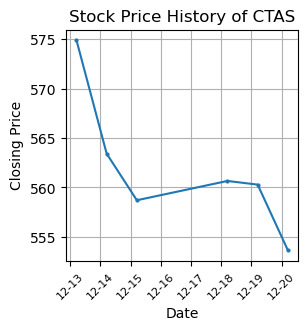

Options data for CTAS:
Average IV for Calls: 0.24409224168255936
Average IV for Puts: 0.4123514619257909
Total Call Volume: 1570.0
Total Call open interest: 3422
Total Call engagement: 4992.0
Total Put Volume: 1446.0
Total Put open interest: 3775
Total Put engagement: 5221.0
Number of ITM Call Options: 67
Number of ITM Put Options: 2


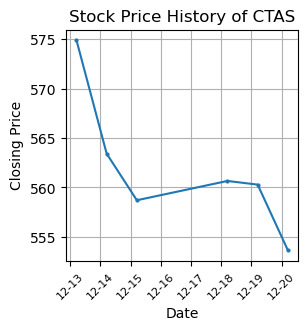

Options data for SCCO:
Average IV for Calls: 0.39286249446442384
Average IV for Puts: 0.5160594720265442
Total Call Volume: 1022.0
Total Call open interest: 14000
Total Call engagement: 15022.0
Total Put Volume: 1005.0
Total Put open interest: 10433
Total Put engagement: 11438.0
Number of ITM Call Options: 91
Number of ITM Put Options: 25


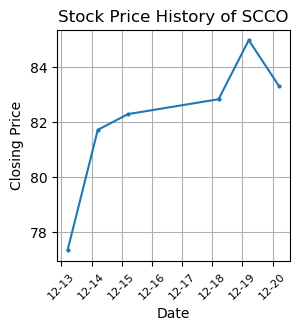

Options data for KMX:
Average IV for Calls: 0.5457617634617699
Average IV for Puts: 0.7026461294903087
Total Call Volume: 16632.0
Total Call open interest: 57326
Total Call engagement: 73958.0
Total Put Volume: 14270.0
Total Put open interest: 97307
Total Put engagement: 111577.0
Number of ITM Call Options: 179
Number of ITM Put Options: 68


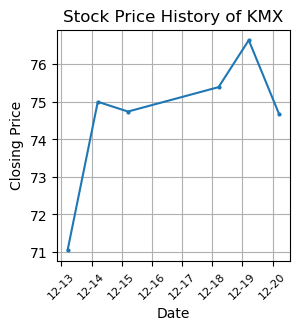

Options data for KMX:
Average IV for Calls: 0.5457617634617699
Average IV for Puts: 0.7026461294903087
Total Call Volume: 16632.0
Total Call open interest: 57326
Total Call engagement: 73958.0
Total Put Volume: 14270.0
Total Put open interest: 97307
Total Put engagement: 111577.0
Number of ITM Call Options: 179
Number of ITM Put Options: 68


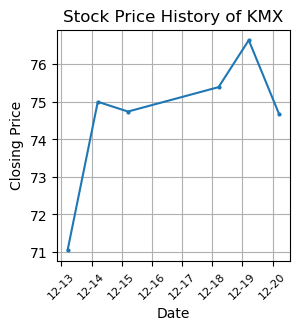

Options data for AIR:
Average IV for Calls: nan
Average IV for Puts: 0.40449746441650386
Total Call Volume: 1038.0
Total Call open interest: 1009.0
Total Call engagement: 2047.0
Total Put Volume: 1082.0
Total Put open interest: 478
Total Put engagement: 1560.0
Number of ITM Call Options: 29
Number of ITM Put Options: 5


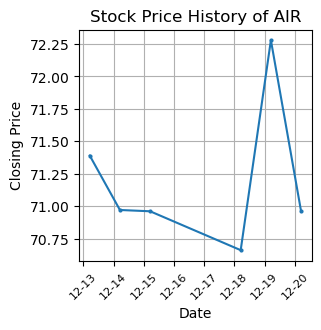

Options data for AIR:
Average IV for Calls: nan
Average IV for Puts: 0.40449746441650386
Total Call Volume: 1038.0
Total Call open interest: 1009.0
Total Call engagement: 2047.0
Total Put Volume: 1082.0
Total Put open interest: 478
Total Put engagement: 1560.0
Number of ITM Call Options: 29
Number of ITM Put Options: 5


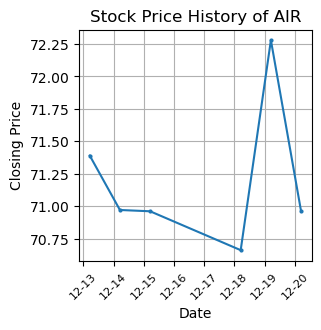

Options data for APOG:
Average IV for Calls: 0.36371080399286176
Average IV for Puts: nan
Total Call Volume: 229.0
Total Call open interest: 670
Total Call engagement: 899.0
Total Put Volume: 69.0
Total Put open interest: 810.0
Total Put engagement: 879.0
Number of ITM Call Options: 10
Number of ITM Put Options: 1


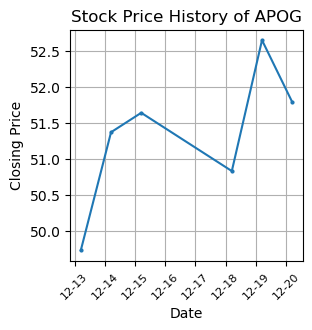

Options data for APOG:
Average IV for Calls: 0.36371080399286176
Average IV for Puts: nan
Total Call Volume: 229.0
Total Call open interest: 670
Total Call engagement: 899.0
Total Put Volume: 69.0
Total Put open interest: 810.0
Total Put engagement: 879.0
Number of ITM Call Options: 10
Number of ITM Put Options: 1


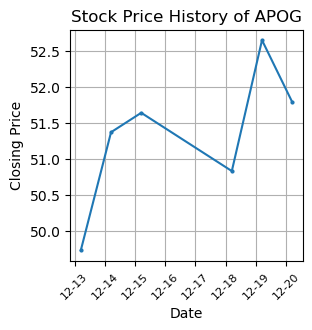

Options data for LMNR:
Average IV for Calls: 0.5869127680664062
Average IV for Puts: 0.566844609375
Total Call Volume: 261.0
Total Call open interest: 1281
Total Call engagement: 1542.0
Total Put Volume: 182.0
Total Put open interest: 67
Total Put engagement: 249.0
Number of ITM Call Options: 5
Number of ITM Put Options: 1


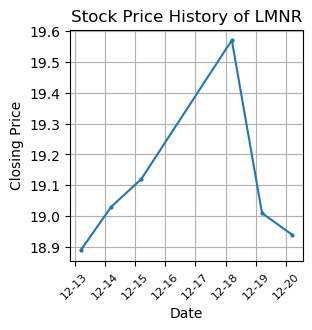

Options data for LMNR:
Average IV for Calls: 0.5869127680664062
Average IV for Puts: 0.566844609375
Total Call Volume: 261.0
Total Call open interest: 1281
Total Call engagement: 1542.0
Total Put Volume: 182.0
Total Put open interest: 67
Total Put engagement: 249.0
Number of ITM Call Options: 5
Number of ITM Put Options: 1


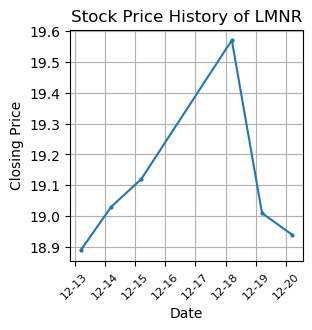

Options data for CCL:
Average IV for Calls: 0.8530550560645707
Average IV for Puts: 0.7964484638731743
Total Call Volume: 169533.0
Total Call open interest: 1024240
Total Call engagement: 1193773.0
Total Put Volume: 80745.0
Total Put open interest: 1330157
Total Put engagement: 1410902.0
Number of ITM Call Options: 200
Number of ITM Put Options: 75


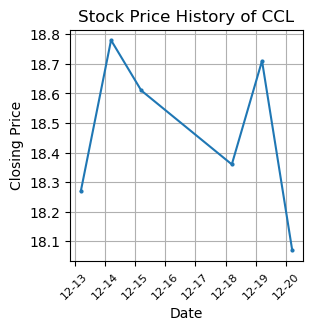

Options data for MDRX:
Average IV for Calls: 0.984548575592041
Average IV for Puts: 0.876406987508138
Total Call Volume: 4073.0
Total Call open interest: 28861
Total Call engagement: 32934.0
Total Put Volume: 5454.0
Total Put open interest: 26497
Total Put engagement: 31951.0
Number of ITM Call Options: 10
Number of ITM Put Options: 7


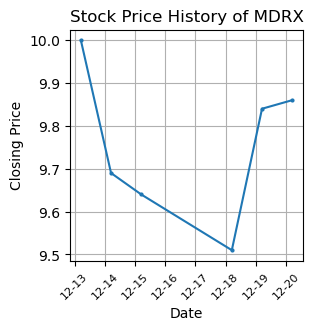

Options data for ISSC:
Average IV for Calls: 0.6321335973307292
Average IV for Puts: nan
Total Call Volume: 110.0
Total Call open interest: 120
Total Call engagement: 230.0
Total Put Volume: 16.0
Total Put open interest: 20.0
Total Put engagement: 36.0
Number of ITM Call Options: 4
Number of ITM Put Options: 1


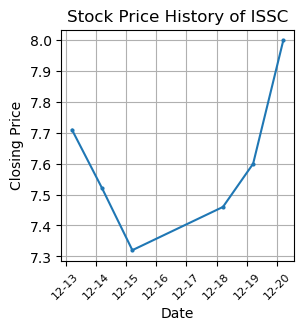

Options data for BYFC:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 55.0
Total Call open interest: 190
Total Call engagement: 245.0
Total Put Volume: 0.0
Total Put open interest: 1.0
Total Put engagement: 1.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0


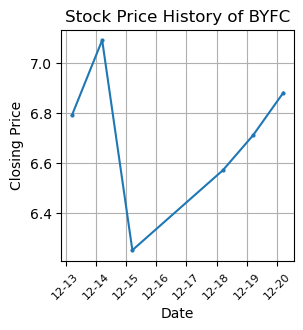

Options data for YELLQ:
Average IV for Calls: 1.3014791525774572
Average IV for Puts: 2.5036990987577887
Total Call Volume: 562.0
Total Call open interest: 14399
Total Call engagement: 14961.0
Total Put Volume: 488.0
Total Put open interest: 10374
Total Put engagement: 10862.0
Number of ITM Call Options: 24
Number of ITM Put Options: 4


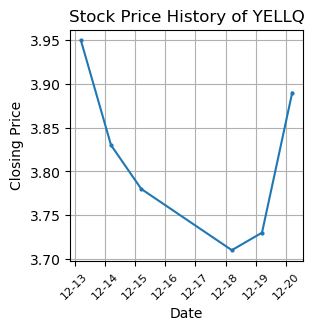

Options data for DZSI:
Average IV for Calls: 2.0266943619791666
Average IV for Puts: nan
Total Call Volume: 43.0
Total Call open interest: 614
Total Call engagement: 657.0
Total Put Volume: 1.0
Total Put open interest: 5.0
Total Put engagement: 6.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


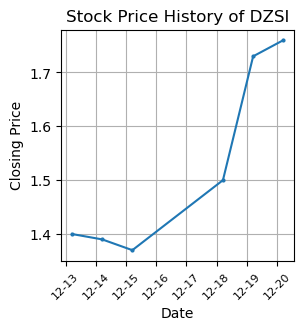

Options data for CTXR:
Average IV for Calls: 3.0642383550347225
Average IV for Puts: 3.5286482812499997
Total Call Volume: 90.0
Total Call open interest: 39476
Total Call engagement: 39566.0
Total Put Volume: 55
Total Put open interest: 725
Total Put engagement: 780
Number of ITM Call Options: 0
Number of ITM Put Options: 5


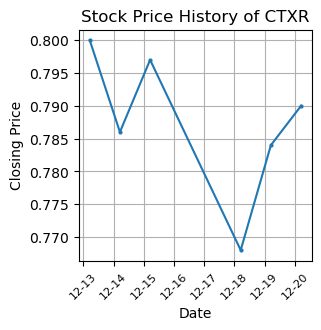

Options data for CSSE:
Average IV for Calls: 3.8528663606770834
Average IV for Puts: nan
Total Call Volume: 85.0
Total Call open interest: 2978
Total Call engagement: 3063.0
Total Put Volume: 92.0
Total Put open interest: 2539.0
Total Put engagement: 2631.0
Number of ITM Call Options: 0
Number of ITM Put Options: 12


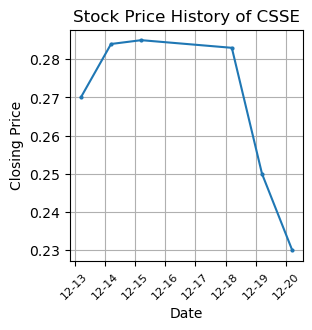

Options data for DSHK:
Average IV for Calls: 2.1666691666666664
Average IV for Puts: 3.333333333333334e-06
Total Call Volume: 12.0
Total Call open interest: 29603.0
Total Call engagement: 29615.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


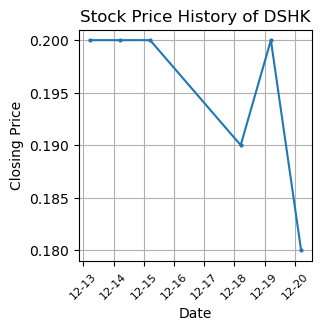

Options data for FRCB:
Average IV for Calls: 5.6833818840144215
Average IV for Puts: 0.39814896100427344
Total Call Volume: 495
Total Call open interest: 62937
Total Call engagement: 63432
Total Put Volume: 213.0
Total Put open interest: 9713
Total Put engagement: 9926.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


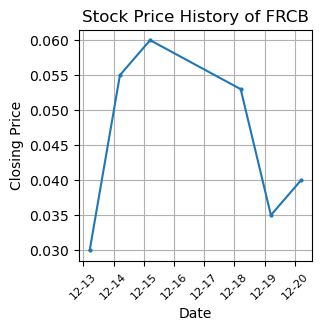

Options data for TTCFQ:
Average IV for Calls: 0.029412058823529413
Average IV for Puts: 2.1960784313725495e-06
Total Call Volume: 69.0
Total Call open interest: 37200
Total Call engagement: 37269.0
Total Put Volume: 35.0
Total Put open interest: 8218.0
Total Put engagement: 8253.0
Number of ITM Call Options: 0
Number of ITM Put Options: 29


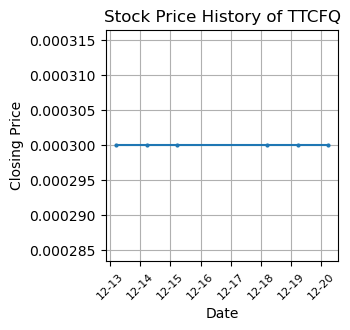

In [8]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-21'
ticker_data_sorted = scrape_and_process_yahoo_finance_data(day)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date - timedelta(days=1)
start_date = release_date - timedelta(days=8)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
